## Exercise 6 | Support Vector Machines
### =============== Part 1: Loading and Visualizing Data ================

Loading and Visualizing Data ...


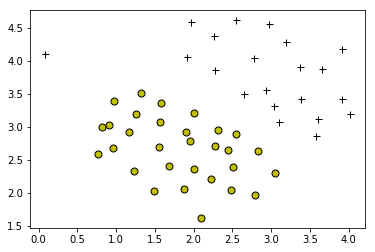

In [1]:
from ex6 import *
%matplotlib inline
print('Loading and Visualizing Data ...')

# Load from ex6data1: 
# You will have X, y in your environment
from scipy import io as sio
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].reshape(-1)

# Plot training data
plotData(X, y)

### ==================== Part 2: Training Linear SVM ====================
线性核为$$k = X_i^TX_j$$

Training Linear SVM ...


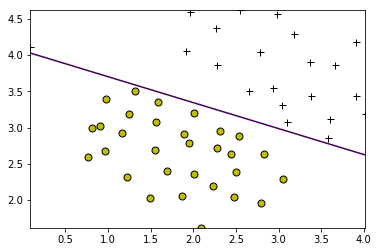

In [2]:
# Load from ex6data1: 
# You will have X, y in your environment
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].reshape(-1)

print('Training Linear SVM ...')

from sklearn import svm
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1000
clf = svm.SVC(C=C, kernel=linearKernel, tol=1e-3, max_iter=-1)
model = clf.fit(X, y)
visualizeBoundaryLinear(X, y, model)

### =============== Part 3: Implementing Gaussian Kernel ===============
高斯核为$$k = e^{-\frac{(X_i - X_j)^T(X_i - X_j)}{2\sigma^2}}$$

In [3]:
print('Evaluating the Gaussian Kernel ...')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = np.asscalar(gaussianKernel(x1.reshape(1, -1), x2.reshape(1, -1), sigma))

print(f'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {sigma:g} :'
         f'\n\t{sim:f}\n(for sigma = 2, this value should be about 0.324652)')

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


### =============== Part 4: Visualizing Dataset 2 ================

Loading and Visualizing Data ...


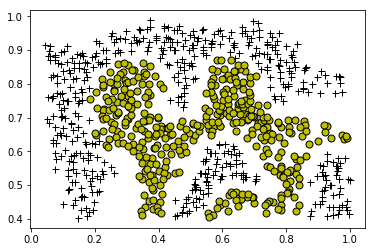

In [4]:
print('Loading and Visualizing Data ...')

# Load from ex6data2: 
# You will have X, y in your environment
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].reshape(-1)

# Plot training data
plotData(X, y)

### ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...


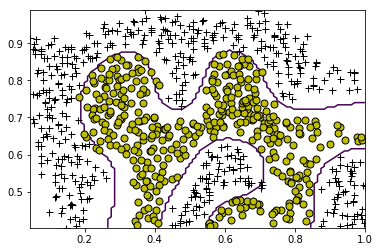

In [5]:
print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...')

# Load from ex6data2: 
# You will have X, y in your environment
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].reshape(-1)

# SVM Parameters
C = 1
sigma = 0.1

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
import warnings
warnings.filterwarnings('ignore')
clf = svm.SVC(C=C, kernel=lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = clf.fit(X, y)
visualizeBoundary(X, y, model)

### =============== Part 6: Visualizing Dataset 3 ================

Loading and Visualizing Data ...


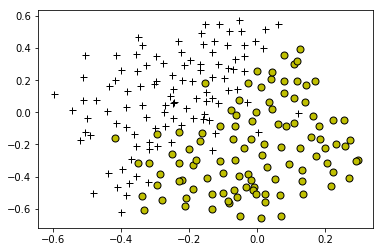

In [6]:
print('Loading and Visualizing Data ...')

# Load from ex6data3: 
# You will have X, y in your environment
data = sio.loadmat('ex6data3.mat')
X = data['X']
y = data['y'].reshape(-1)

# Plot training data
plotData(X, y)

### ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

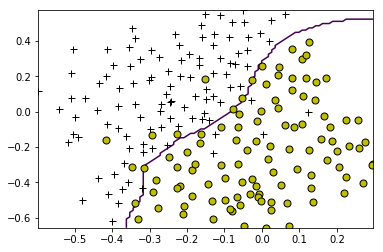

In [7]:
# Load from ex6data3: 
# You will have X, y in your environment
data = sio.loadmat('ex6data3.mat')
X = data['X']
y = data['y'].reshape(-1)
Xval = data['Xval']
yval = data['yval'].reshape(-1)

# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
clf = svm.SVC(C=C, kernel=lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = clf.fit(X, y)
visualizeBoundary(X, y, model)

###### 以上部分代码在[ex6.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex6/ex6.py)中

## Exercise 6 | Spam Classification with SVMs
### ==================== Part 1: Email Preprocessing ====================

In [8]:
from ex6_spam import *
print('Preprocessing sample email (emailSample1.txt)')

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices  = processEmail(file_contents)

# Print Stats
print('Word Indices: ')
print(f' {word_indices}')

Preprocessing sample email (emailSample1.txt)
==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
 [85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 478, 1892, 1509, 798, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


### ==================== Part 2: Feature Extraction ====================

In [9]:
print('Extracting features from sample email (emailSample1.txt)')

# Extract Features
file_contents = readFile('emailSample1.txt')
word_indices  = processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print(f'Length of feature vector: {len(features)}')
print(f'Number of non-zero entries: {sum(features > 0)}')

Extracting features from sample email (emailSample1.txt)
==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 45


### =========== Part 3: Train Linear SVM for Spam Classification ========

In [10]:
# Load the Spam Email dataset
# You will have X, y in your environment
from scipy import io as sio
data = sio.loadmat('spamTrain.mat')
X = data['X']
y = data['y'].reshape(-1)

print('Training Linear SVM (Spam Classification)')
print('(this may take 1 to 2 minutes) ...')

from sklearn import svm
C = 0.1
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X, y)

p = clf.predict(X)

print(f'Training Accuracy: {(p == y).mean() * 100:f}')

Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...
Training Accuracy: 99.825000


### =================== Part 4: Test Spam Classification ================

In [11]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = sio.loadmat('spamTest.mat')
Xtest = data['Xtest']
ytest = data['ytest'].reshape(-1)

print('Evaluating the trained Linear SVM on a test set ...')

p = clf.predict(Xtest)

print(f'Test Accuracy: {(p == ytest).mean() * 100:f}')

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.900000


### ================= Part 5: Top Predictors of Spam ====================

In [12]:
# Sort the weights and obtin the vocabulary list
weight = np.sort(clf.coef_[0])[::-1]
idx = clf.coef_[0].argsort()[::-1]
vocabList = getVocabList()

print('Top predictors of spam: ')
for i in range(15):
    print(f' {vocabList[idx[i]]} ({weight[i]:f}) ')

Top predictors of spam: 
 our (0.500614) 
 click (0.465916) 
 remov (0.422869) 
 guarante (0.383622) 
 visit (0.367710) 
 basenumb (0.345064) 
 dollar (0.323632) 
 will (0.269724) 
 price (0.267298) 
 pleas (0.261169) 
 most (0.257298) 
 nbsp (0.253941) 
 lo (0.253467) 
 ga (0.248297) 
 hour (0.246404) 


### =================== Part 6: Try Your Own Emails =====================

In [13]:
# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filenames = ['spamSample1.txt', 'spamSample2.txt', 'emailSample1.txt', 'emailSample2.txt']

for filename in filenames:
    # Read and predict
    file_contents = readFile(filename)
    word_indices  = processEmail(file_contents)
    x             = emailFeatures(word_indices)
    p = clf.predict(x.reshape(1, -1))

    print(f'Processed {filename}\n\nSpam Classification: {p}')
    print('(1 indicates spam, 0 indicates not spam)')

==== Processed Email ====

do you want to make dollarnumb or more per week if you are a motiv and 
qualifi individu i will person demonstr to you a system that will make you 
dollarnumb number per week or more thi is not mlm call our number hour 
prerecord number to get the detail numbernumbernumb i need peopl who want to 
make seriou money make the call and get the fact invest number minut in 
yourself now numbernumbernumb look forward to your call and i will introduc 
you to peopl like yourself who are current make dollarnumb number plu per 
week numbernumbernumb 
numberljgvnumbernumberleannumberlrmsnumbernumberwxhonumberqiytnumbernumberrjuvnumberhqcfnumbernumbereidbnumberdmtvlnumb 

Processed spamSample1.txt

Spam Classification: [1]
(1 indicates spam, 0 indicates not spam)
==== Processed Email ====

best buy viagra gener onlin viagra numbermg x number pill dollarnumb free 
pill reorder discount top sell number qualiti satisfact guarante we accept 
visa master echeck payment number 

###### 以上部分代码在[ex6_spam.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex6/ex6_spam.py)中

### Todo: Build Your Own Dataset
Data from http://spamassassin.apache.org/old/publiccorpus/

### 总结：学会了`scikit-learn`包里面的svm工具的使用，学会了邮件分类的基本方法和`PorterStemmer`提取词干的方法。自己建立数据集还很麻烦，先不做了:D